In [1]:
# https://ucsd.bootcampcontent.com/UCSD-Coding-Bootcamp/ucsd-sd-data-pt-01-2020-u-c/blob/master/01-Lesson-Plans/21-Machine-Learning/1/Activities/08-Stu_Respiratory_Disease/Solved/Stu_Respiratory_Disease.ipynb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

smoking = pd.read_csv('AMZN_2018-feb14_2020.csv')
smoking.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2018,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500
1,1/3/2018,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800
2,1/4/2018,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100
3,1/5/2018,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700
4,1/8/2018,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500


In [3]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
#smoking = pd.get_dummies(smoking)
#smoking.head()
### END SOLUTION

In [4]:
# Drop extra dummy columns

### BEGIN SOLUTION
smoking = smoking.drop(columns=['Date', 'Adj Close'])
smoking.head()
### END SOLUTION

,Open,High,Low,Close,Volume
0,1172.000000,1190.000000,1170.510010,1189.010010,2694500
1,1188.300049,1205.489990,1188.300049,1204.199951,3108800
2,1205.000000,1215.869995,1204.660034,1209.589966,3022100
3,1217.510010,1229.140015,1210.000000,1229.140015,3544700
4,1236.000000,1253.079956,1232.030029,1246.869995,4279500


In [5]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = smoking[['Open', 'High', 'Low', 'Volume']]
y = smoking["Close"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(533, 4) (533, 1)


In [6]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [9]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

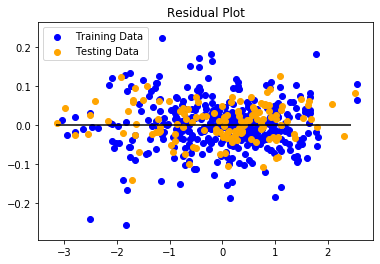

In [10]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [16]:
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9960845962626412
Testing Score: 0.9981651511954598


In [12]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.002330576172185777, R2: 0.9981651511954598


In [13]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.004845531229492586, R2: 0.996185141987675


In [14]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0023278824351213867, R2: 0.998167271958682


In [15]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.004796651690590007, R2: 0.9962236245588916
